lenth of imfs 2
[array([-6.42462448e-02, -6.47029397e-02, -2.23044236e-02,  2.38450742e-03,
       -3.20705996e-03,  1.57007516e-03,  5.08616444e-03, -6.84105028e-04,
        3.24702677e-03, -1.86333895e-03,  1.62254003e-02,  1.02843564e-02,
        2.13841982e-02,  2.91536749e-02,  2.33223912e-02,  3.47516248e-03,
        6.99582622e-03,  4.61781269e-02,  4.18592332e-02,  1.58532594e-02,
        1.84943957e-02,  2.94045492e-02,  2.69467034e-02,  2.16701283e-02,
        3.20509790e-02,  1.82450468e-02,  4.58254232e-02,  5.77388004e-02,
        3.27421179e-02,  2.36154364e-02,  4.29025536e-02,  3.83606924e-02,
        3.57508236e-02,  2.81227313e-02,  4.46987634e-02,  4.17220895e-02,
        4.39234178e-02,  4.26244945e-02,  2.24218339e-02,  4.27990561e-02,
        5.44461383e-02,  3.40882793e-02,  2.56438380e-02,  5.00465687e-02,
        4.65209707e-02,  3.00544280e-02,  2.87841269e-02,  4.74847849e-02,
        4.10379590e-02,  2.45947192e-02,  4.78646507e-02,  2.62608237e-02,
        

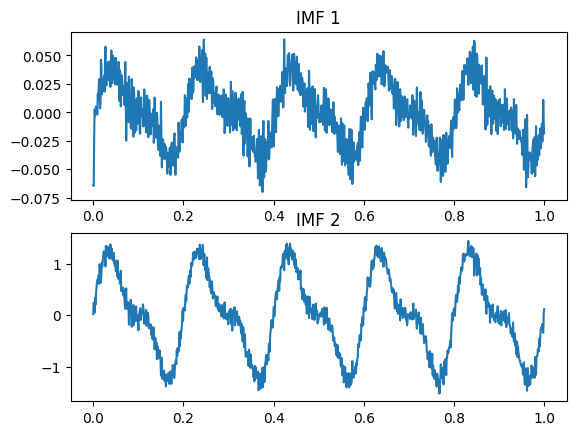

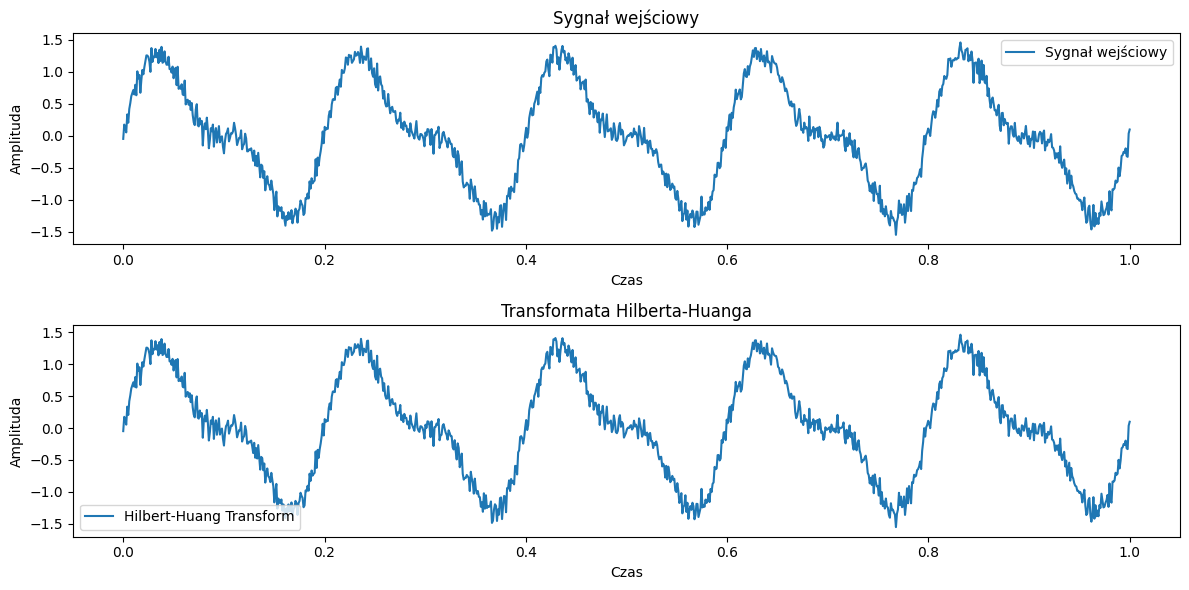

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.interpolate import interp1d

# Tworzenie sygnału
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t) + np.random.normal(np.sin(0.1 * t))
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t) + np.random.normal(scale=0.1, size=len(t))

# Analiza EMD
def emd(x):
    # Wyodrębnienie IMF
    imfs = []
    residue = x.copy()
    while True:
        h = residue
        for _ in range(5):  # Wartość arbitralna, określa liczbę iteracji EMD
            d = np.gradient(h)
            min_env = interp1d(t, np.minimum(h, d))(t)
            max_env = interp1d(t, np.maximum(h, d))(t)
            m = (min_env + max_env) / 2
            h = h - m
        imfs.append(h)
        residue -= h
        if np.max(np.abs(h)) < 0.2 * np.max(np.abs(residue)):
            imfs.append(residue)
            break
    #print all imfs
    print(f"lenth of imfs {len(imfs)}")
    print(imfs)
    print(type(imfs))
    for i, imf in enumerate(imfs):
        plt.subplot(len(imfs), 1, i+1)
        plt.plot(t, imf)
        plt.title('IMF {}'.format(i+1))
    return imfs

imfs = emd(x)

# Transformata Hilberta
def hht(imfs):
    hht_result = np.zeros_like(imfs[0], dtype=np.complex128)
    for imf in imfs:
        analytic_signal = hilbert(imf)
        hht_result += analytic_signal
    return hht_result

hht_result = hht(imfs)

# Wykresy
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Sygnał wejściowy')
plt.title('Sygnał wejściowy')
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, np.real(hht_result), label='Hilbert-Huang Transform')
plt.title('Transformata Hilberta-Huanga')
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.legend()

plt.tight_layout()
plt.show()

np.array 


In [19]:
#compare x and np.real(hht_result) tru if teh same
print(np.allclose(x, np.imag(hht_result)))



False


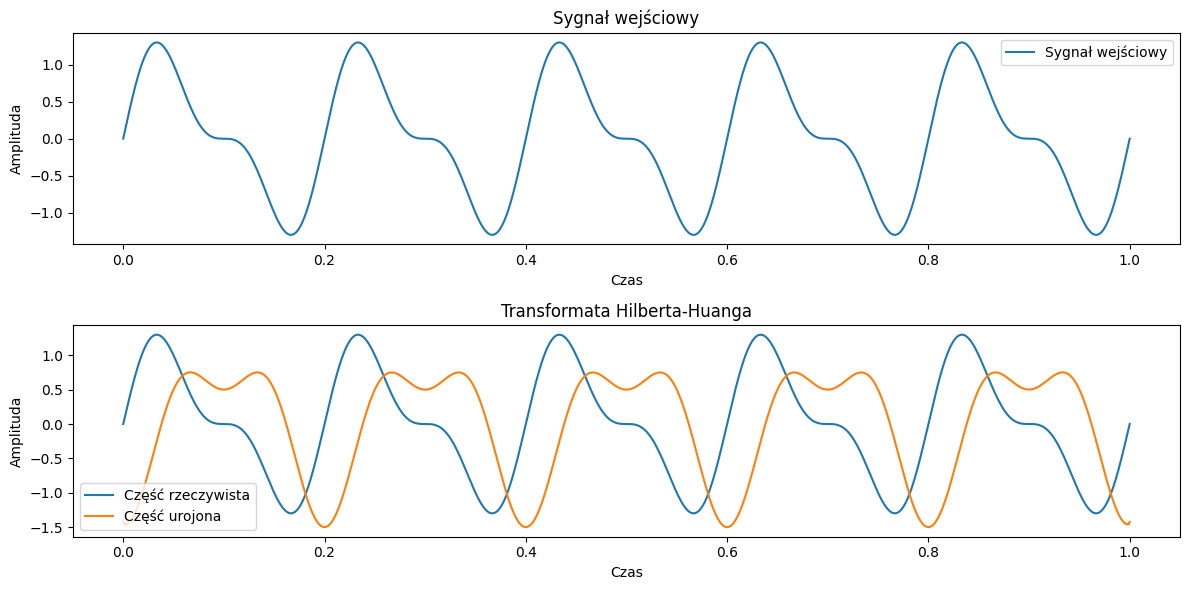

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Sygnał wejściowy')
plt.title('Sygnał wejściowy')
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, np.real(hht_result), label='Część rzeczywista')
plt.plot(t, np.imag(hht_result), label='Część urojona')
plt.title('Transformata Hilberta-Huanga')
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
!pip install PyWavelets
 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.9 MB/s eta 0:00:000m eta 0:00:010:01:01


/home/daniel/micromamba/envs/EEG310/lib/python3.10/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


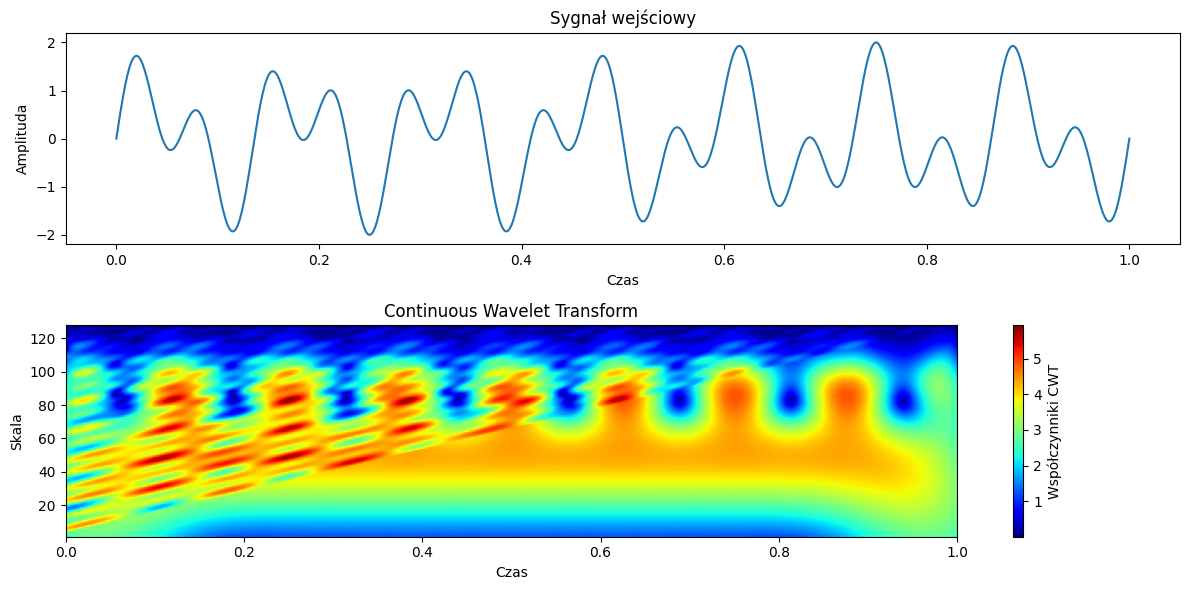

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Przykładowy sygnał do analizy
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 15 * t)

# Obliczanie CWT
wavelet = 'cmor'  # Wybór rodzaju falki
scales = np.arange(1, 128)  # Skale do analizy
coefficients, frequencies = pywt.cwt(x, scales, )

# Wykresy
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Sygnał wejściowy')
plt.xlabel('Czas')
plt.ylabel('Amplituda')

plt.subplot(2, 1, 2)
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 128], cmap='jet', aspect='auto')
plt.colorbar(label='Współczynniki CWT')
plt.title('Continuous Wavelet Transform')
plt.xlabel('Czas')
plt.ylabel('Skala')

plt.tight_layout()
plt.show()


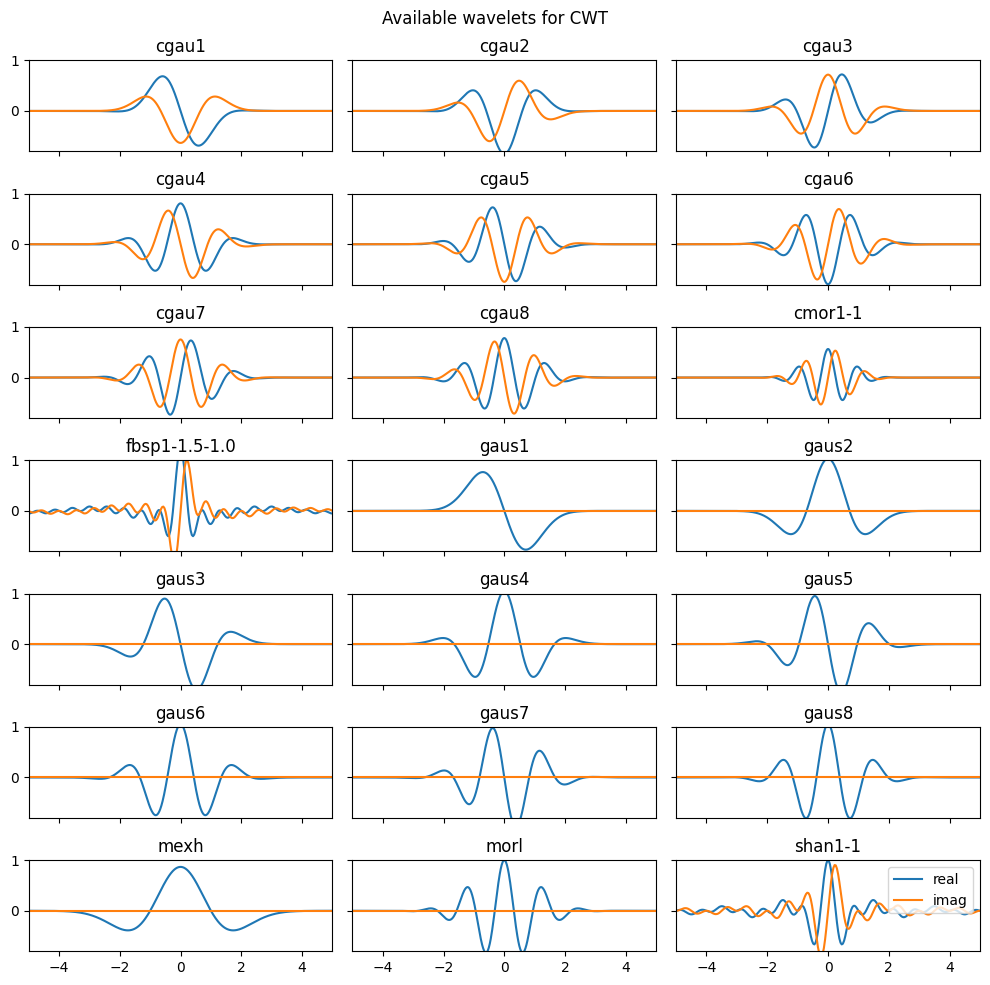

In [48]:
wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()